# Biglow Wind Farm - Run with Local Effects

In [1]:
# load modules
from floris.floris import Floris
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## Setup floris and process input file

In [2]:
floris = Floris("Example_WindFarm.json")

## Elevation Information

In [3]:
elev = [0,0,0,0,90,90,90,90,180,180,180,180,270,270,270,270]

In [4]:
# adjust the height of each turbine using elevation

for i, (coord, turbine) in enumerate(floris.farm.turbine_map.items()):
    turbine.elevation = elev[i]-np.min(elev)
    turbine.grid = turbine._create_swept_area_grid()
    print('turbine elevation = ', turbine.elevation)
    


turbine elevation =  0
turbine elevation =  0
turbine elevation =  0
turbine elevation =  0
turbine elevation =  90
turbine elevation =  90
turbine elevation =  90
turbine elevation =  90
turbine elevation =  180
turbine elevation =  180
turbine elevation =  180
turbine elevation =  180
turbine elevation =  270
turbine elevation =  270
turbine elevation =  270
turbine elevation =  270


## Calculate Wake

In [5]:
import time

t1 = time.time()

floris.farm.flow_field.calculate_wake()

t2 = time.time()

print('Time to compute wake = ', t2-t1, 's')

Time to compute wake =  0.02459120750427246 s


## Compute Velocities at each Turbine

In [6]:
for coord, turbine in floris.farm.turbine_map.items():
    print(str(coord) + ":")
    #print("\tCp -", turbine.Cp)
    #print("\tCt -", turbine.Ct)
    print("\tpower -", turbine.power)
    #print("\tai -", turbine.aI)
    print("\taverage velocity -", turbine.get_average_velocity())

(0, 0):
	power - 1712005.1679717556
	average velocity - 7.85065163365446
(0, 378):
	power - 1712005.16797175
	average velocity - 7.850651633654451
(0, 756):
	power - 1712005.16797175
	average velocity - 7.850651633654451
(0, 1134):
	power - 1712005.16797175
	average velocity - 7.850651633654451
(630, 0):
	power - 856641.1123823348
	average velocity - 6.262337405997198
(630, 378):
	power - 856641.1123823343
	average velocity - 6.262337405997197
(630, 756):
	power - 856641.1123823343
	average velocity - 6.262337405997197
(630, 1134):
	power - 856641.1123823343
	average velocity - 6.262337405997197
(1260, 0):
	power - 885436.8377701532
	average velocity - 6.328082711042017
(1260, 378):
	power - 885436.837769441
	average velocity - 6.328082711040409
(1260, 756):
	power - 885436.837769441
	average velocity - 6.328082711040409
(1260, 1134):
	power - 885436.8377701535
	average velocity - 6.3280827110420175
(1890, 0):
	power - 1111558.046057034
	average velocity - 6.8053467445753615
(1890, 378

## Visualization Manager for FLORIS 

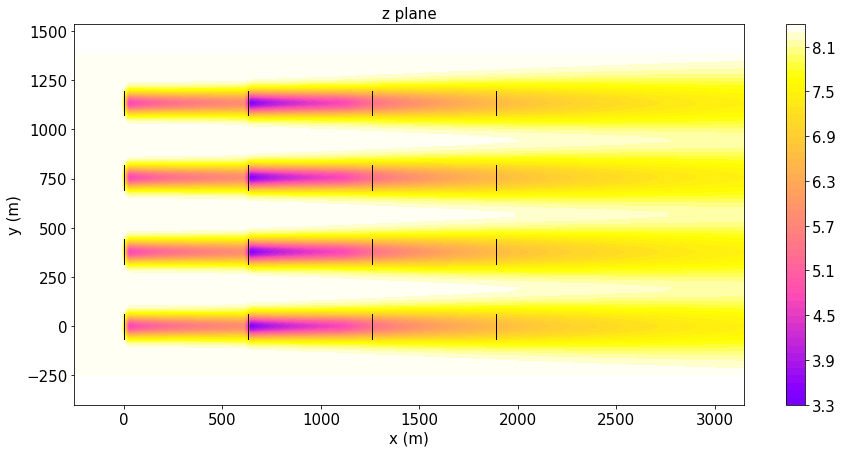

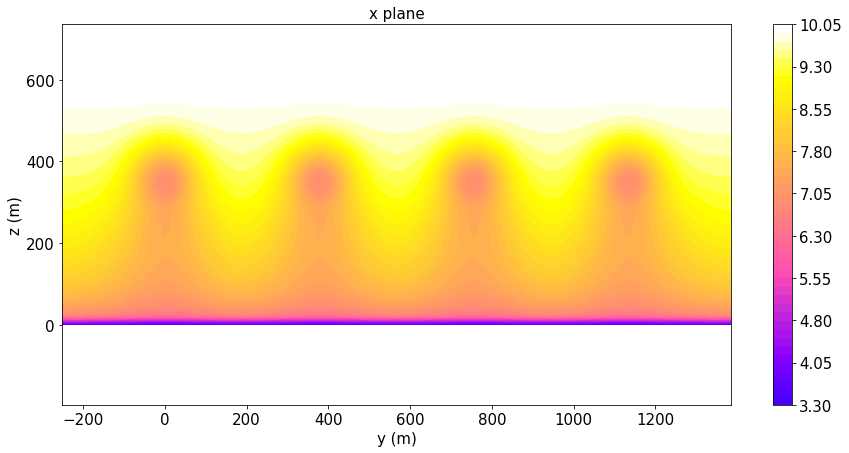

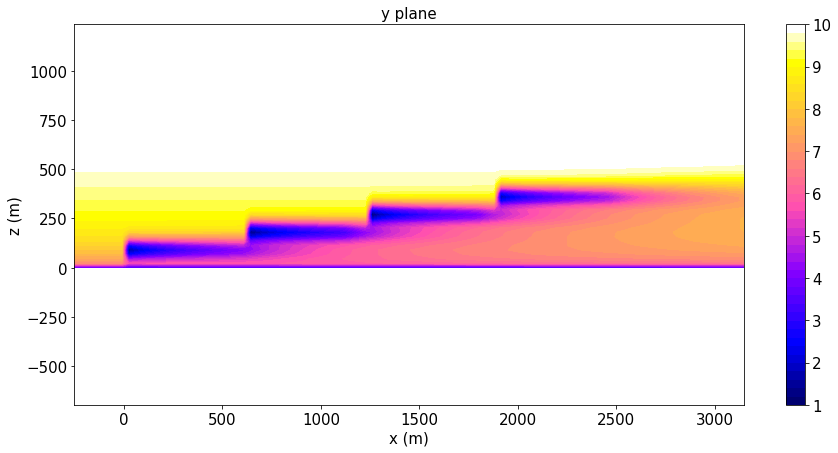

In [7]:
# Visualization
from copy import deepcopy
from visualization_manager import VisualizationManager

ff_viz = deepcopy(floris.farm.flow_field)
grid_resolution = (100, 100, 25)
visualization_manager = VisualizationManager(ff_viz, grid_resolution)
visualization_manager.plot_z_planes([0.25])
visualization_manager.plot_x_planes([0.95])
visualization_manager.plot_y_planes([0.6])